<a href="https://colab.research.google.com/github/zahra-0201/Information-Retrieval/blob/main/Pratikum1_Zahra_Aulia_Rahmani_0110224193_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/SEMESTER 3/IR/praktikum01"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_xml(path + "/data/kompas-beritaPart1.xml")
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [6]:
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
def caseFolding(text):
  text = text.lower()
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'orginal: {contoh}')
print(f'case folded: {caseFolding(contoh)}')

orginal: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
case folded: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


In [9]:
import re

def punctuationRemoval(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'orginal: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

orginal: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
punctuation removed: Terima kasih Kak Kamu sangat baik sekali kepadaku hari ini


In [10]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [11]:
def tokenize(text):
  return text.split(" ")

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


In [12]:
df['tokens'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, , ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, , sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, , resmi, diperkenalkan, p..."


In [13]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
  for token in tokens:
    all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
133,yang,6450
10,di,5824
126,dan,4915
2,,4264
35,ini,2744


In [14]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
133,yang,6450,1
10,di,5824,2
126,dan,4915,3
2,,4264,4
35,ini,2744,5


In [15]:
term_freq_df_sorted['Rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)

tf_sorted_rank = term_freq_df_sorted.sort_values(by='Rank', ascending=True)
tf_sorted_rank.head(20)

,term,freq,rank,Rank
133,yang,6450,1,1
10,di,5824,2,2
126,dan,4915,3,3
2,,4264,4,4
35,ini,2744,5,5
23,dengan,2625,6,6
29,untuk,2583,7,7
31,dari,2460,8,8
18,itu,2437,9,9
97,akan,2055,10,10


In [16]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=100)

,term,freq,rank,Rank,k = f * r
133,yang,6450,1,1,6450
10,di,5824,2,2,11648
126,dan,4915,3,3,14745
2,,4264,4,4,17056
35,ini,2744,5,5,13720
...,...,...,...,...,...
319,para,360,96,96,34560
1112,dapat,360,97,97,34920
10922,republikacoid,352,98,98,34496
406,lain,350,99,99,34650


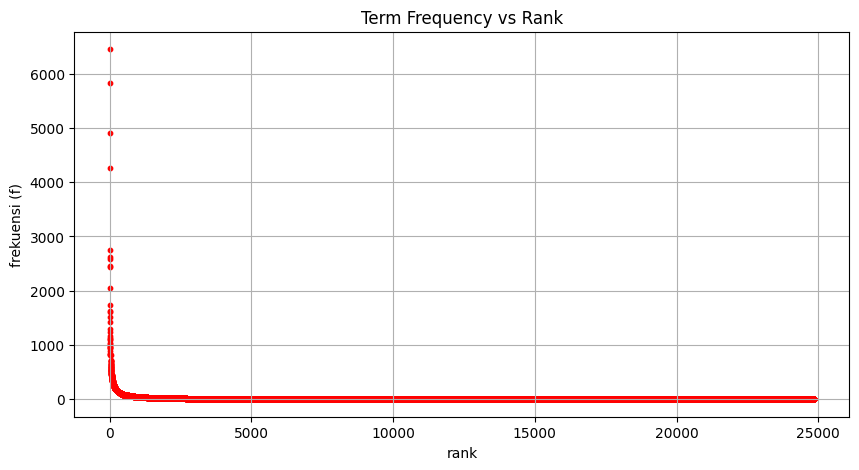

In [17]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)

plt.title("Term Frequency vs Rank")
plt.xlabel("rank")
plt.ylabel("frekuensi (f)")
plt.grid(True)
plt.show()